# wine quality prediction using SVM 
______________________________________________________

# objective :
to find the quality of the white wine  based on the factors present in them :
like fixed acidity , volatile acidity , citric acid , residual sugar , chlorides ,free sulfur dioxide , total sulfur dioxide ,density, pH,sulphates, alcohol,quality. 

# IMPORT LIBRARY

In [20]:
import pandas as pd 
import numpy as np 


# import csv file

In [21]:
file_path=  "C:/Users/krish/OneDrive/Desktop/ybf_intern/winequality-white.csv"
df = pd.read_csv(file_path, delimiter=';')


In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# **visualization**

C:\Users\krish\AppData\Local\Temp\ipykernel_15404\3180679680.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis', ax=axes[0, 0])


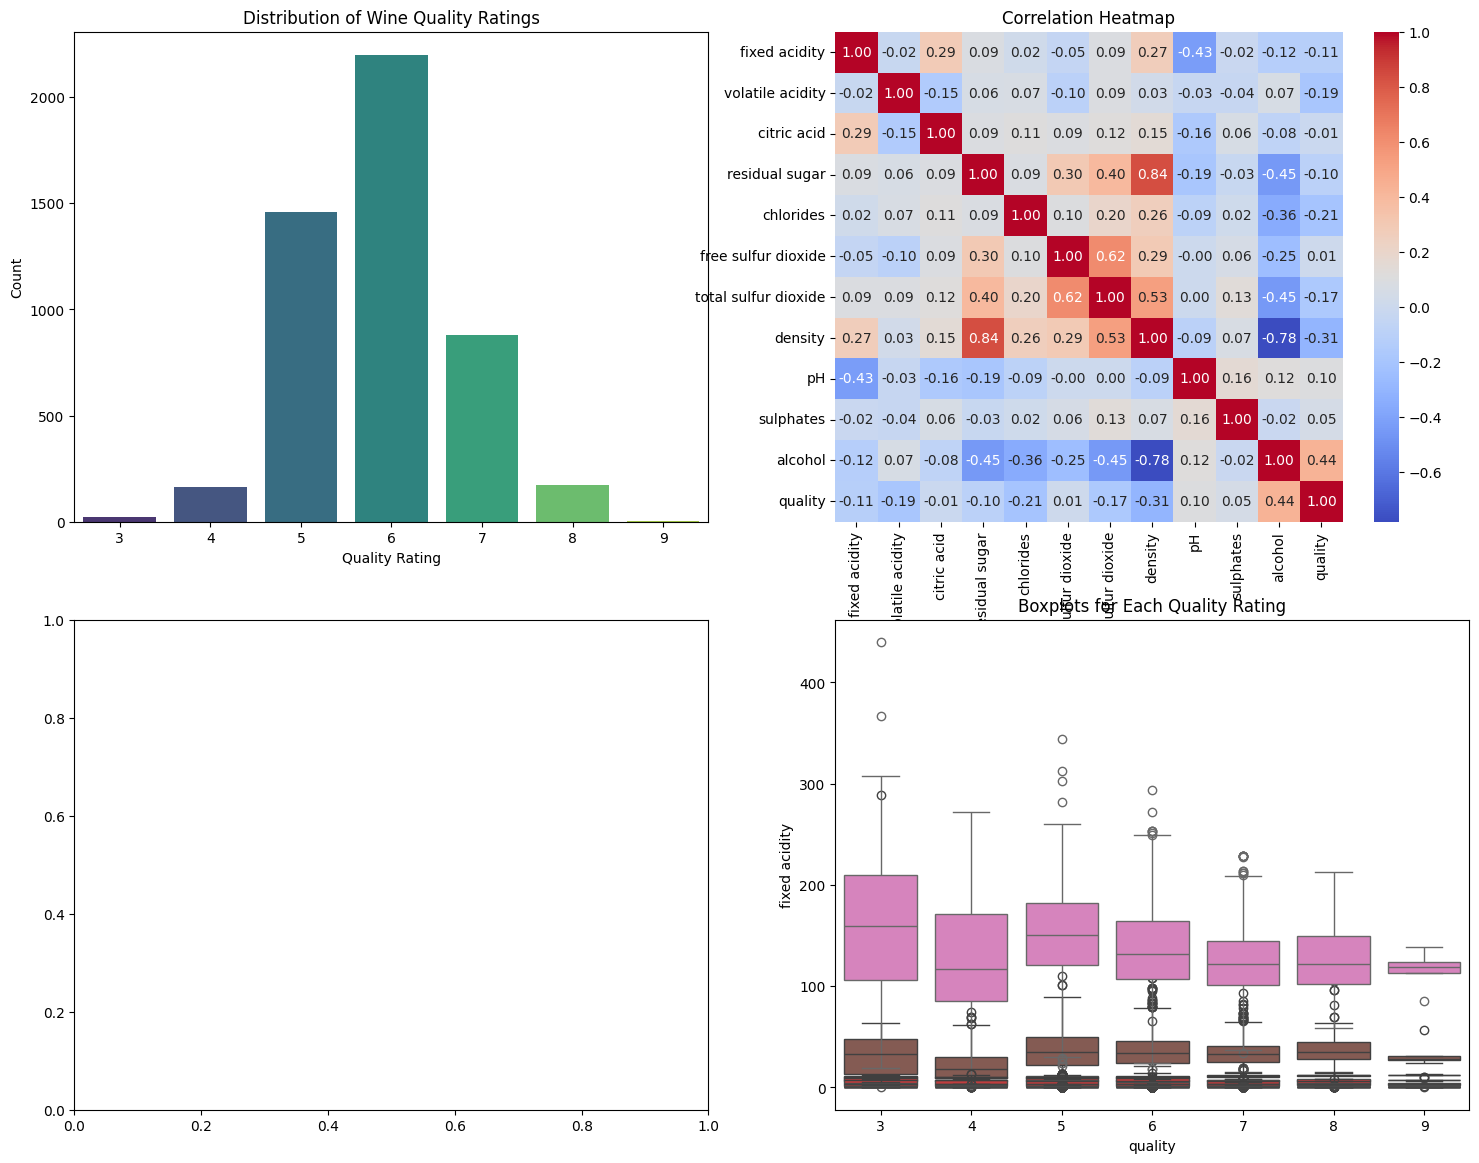

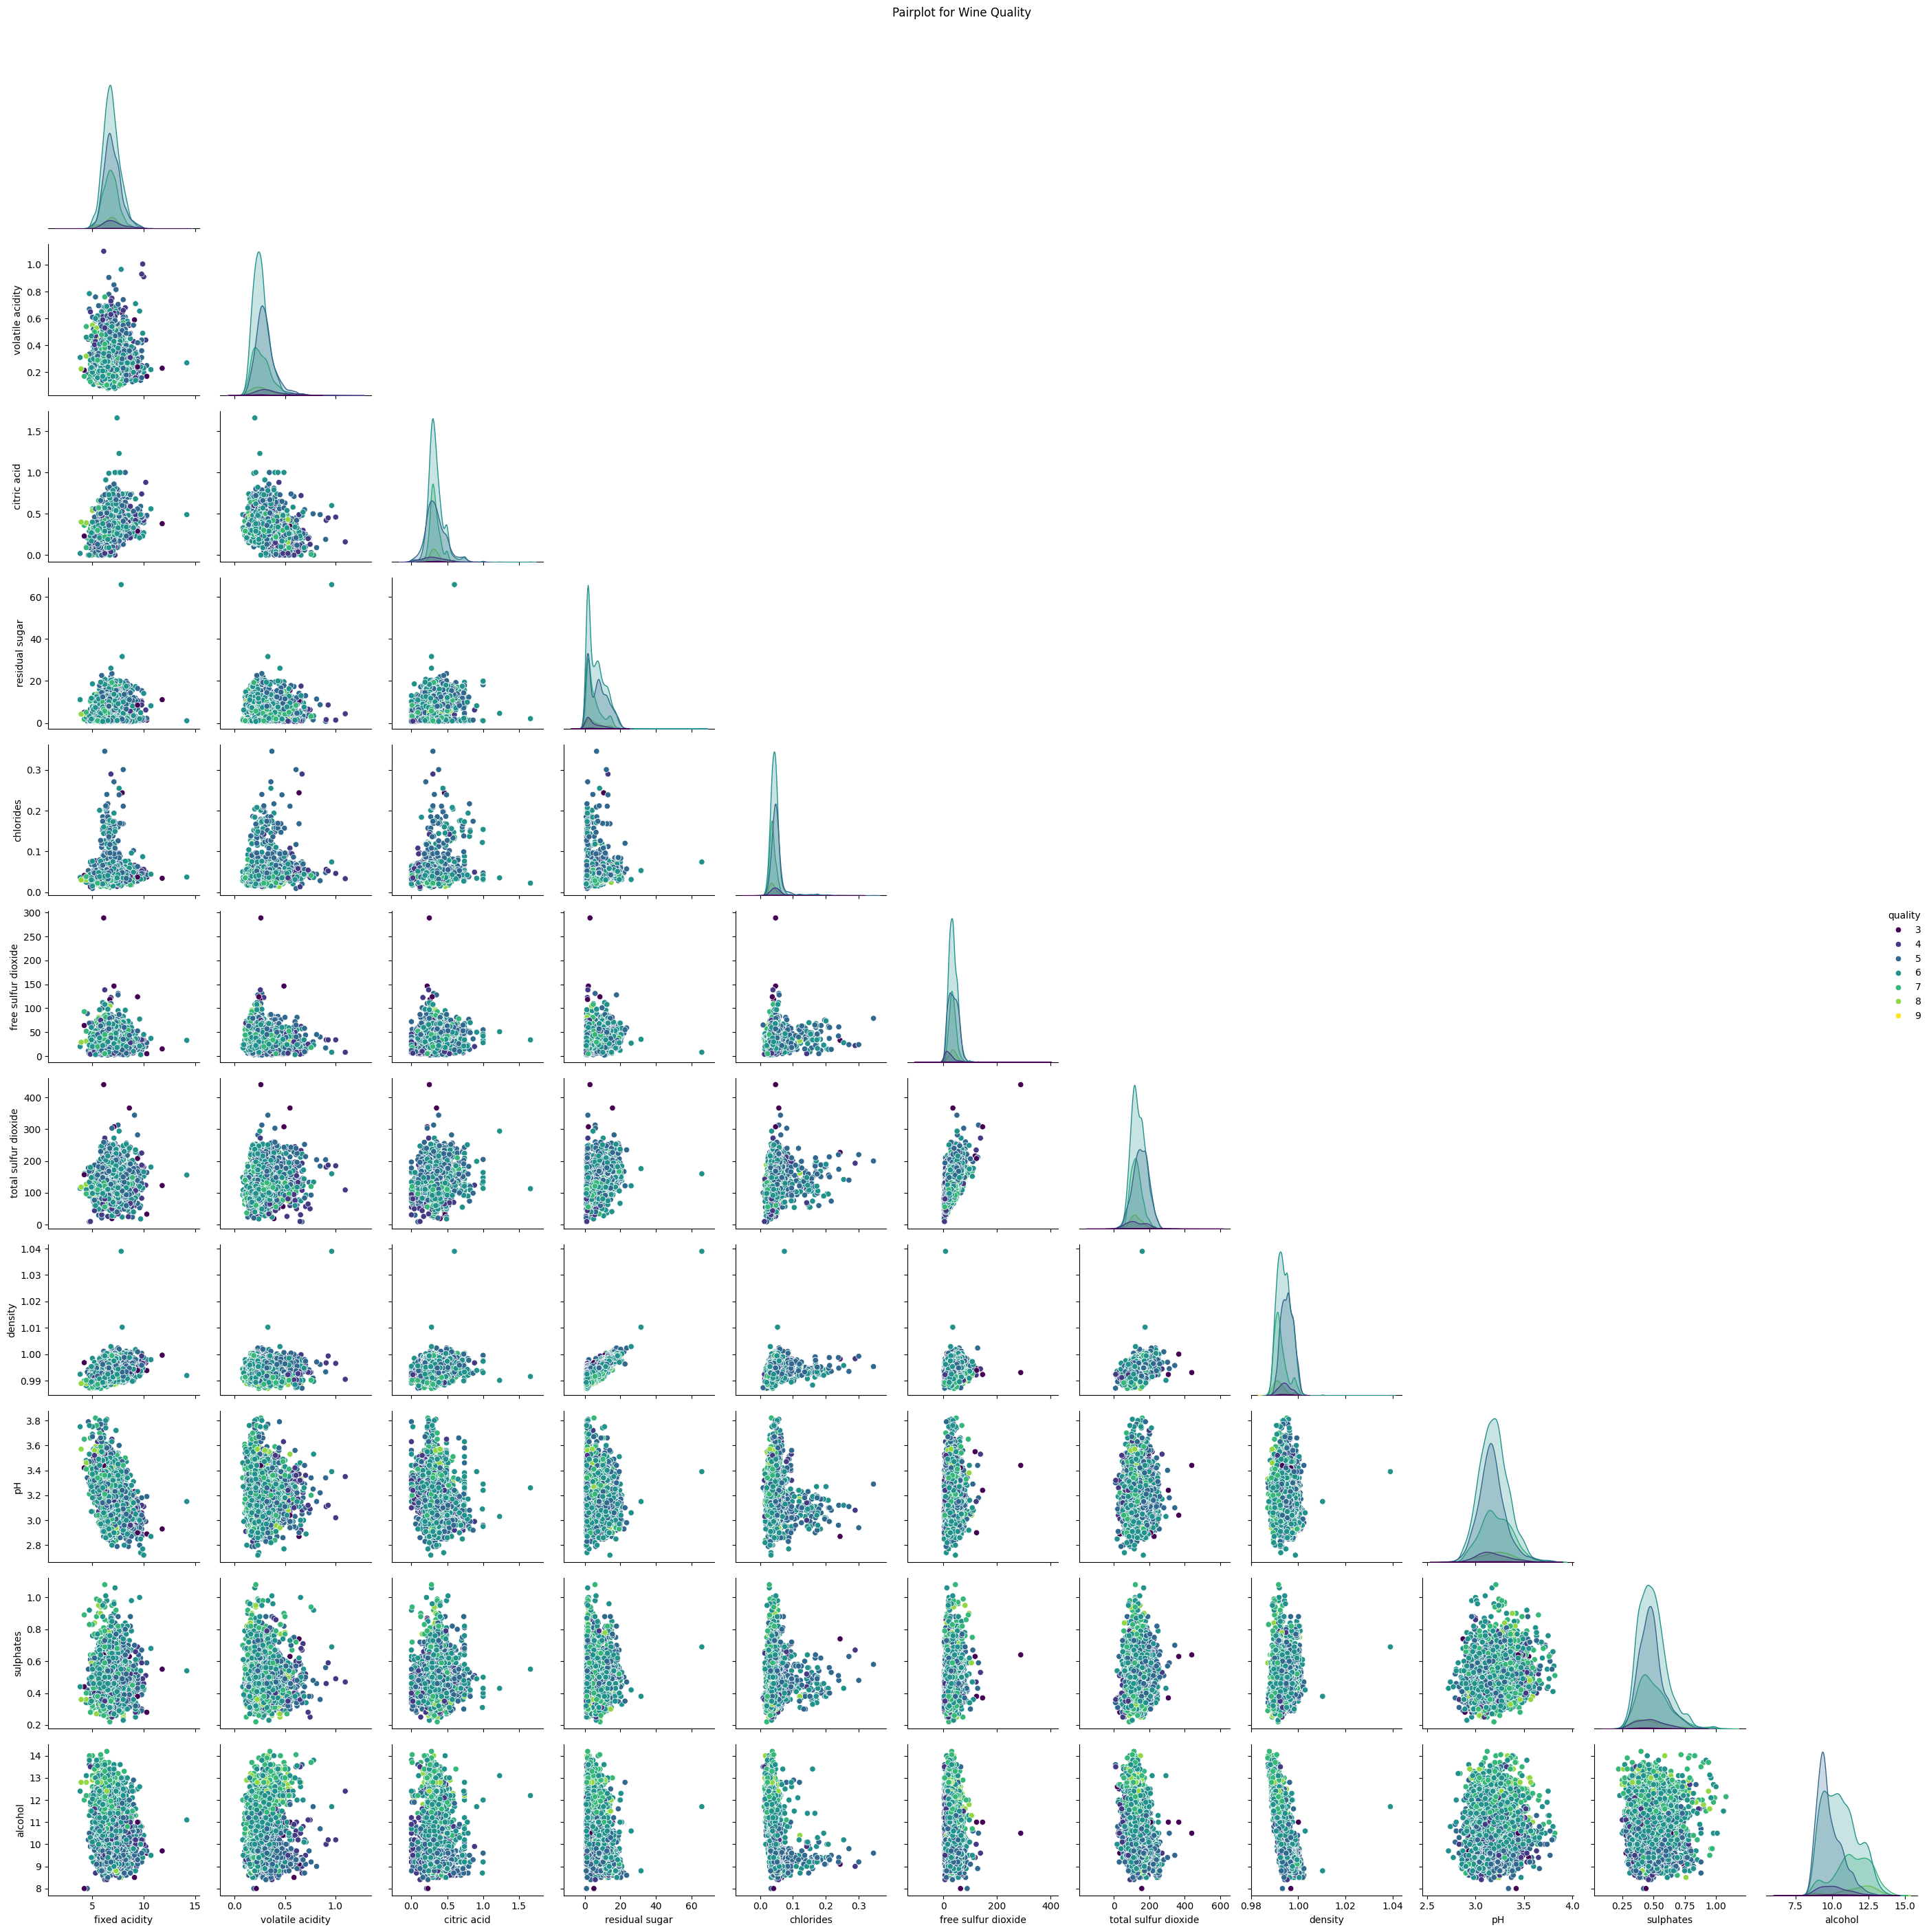

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))

# Plot 1: Distribution of Wine Quality Ratings
sns.countplot(x='quality', data=df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Wine Quality Ratings')
axes[0, 0].set_xlabel('Quality Rating')
axes[0, 0].set_ylabel('Count')

# Plot 2: Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 1])
axes[0, 1].set_title('Correlation Heatmap')

# Plot 3: Pairplot
g = sns.pairplot(df, hue='quality', diag_kind='kde', palette='viridis', corner=True)
g.fig.suptitle('Pairplot for Wine Quality', y=1.02)

# Plot 4: Boxplots for Each Quality Rating
for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(x='quality', y=column, data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplots for Each Quality Rating')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



# getting information from the data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# lets get the statistical report

In [25]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# lets  get to know how many no of columns and rows are there

In [ ]:
df.shape

# getting the unique values from the quality column

In [28]:
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [29]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


# **defining the x , y values**

In [34]:
y = df['quality']
y.shape
print(y)

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64


In [32]:
x = df.drop('quality', axis=1)


In [33]:
x.shape


(4898, 11)

In [35]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


# lets perform the normalisation of the varialble

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)


In [40]:
x_normalized_df = pd.DataFrame(x_normalized, columns=x.columns)

In [41]:
print(x_normalized_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  
0  0.129032  
1  0.241935  
2  0.338710  



# train test split

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
x_train , x_test , y_train , y_test =train_test_split(x_normalized_df,y,test_size=0.3,stratify=y,random_state=2529)

In [46]:
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

# lets get the model

In [51]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

# **model prediction**

In [52]:
y_pred = svc.predict(x_test)

In [53]:
y_pred.shape

(1470,)

# model evalution

In [54]:
from sklearn.metrics import confusion_matrix , classification_report

In [56]:
print(confusion_matrix(y_test ,y_pred))

[[  0   0   1   5   0   0   0]
 [  0   1  23  23   2   0   0]
 [  0   0 245 191   1   0   0]
 [  0   0 110 532  18   0   0]
 [  0   0   5 207  52   0   0]
 [  0   0   0  40  13   0   0]
 [  0   0   0   0   1   0   0]]


In [57]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.04        49
           5       0.64      0.56      0.60       437
           6       0.53      0.81      0.64       660
           7       0.60      0.20      0.30       264
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1470
   macro avg       0.40      0.23      0.22      1470
weighted avg       0.57      0.56      0.52      1470



c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# **explanation**

Classification Report Explanation:
Precision:
Precision measures the accuracy of positive predictions. It is calculated as the ratio of correctly predicted positive observations to the total predicted positives.

Precision for class 3: 0.00 (None of the predictions for class 3 were correct)
Precision for class 4: 1.00 (All predictions for class 4 were correct)
Precision for class 5: 0.64 (64% of the predictions for class 5 were correct)
Precision for class 6: 0.53 (53% of the predictions for class 6 were correct)
Precision for class 7: 0.60 (60% of the predictions for class 7 were correct)
Precision for class 8: 0.00 (None of the predictions for class 8 were correct)
Precision for class 9: 0.00 (None of the predictions for class 9 were correct)
Recall:
Recall (also known as sensitivity) calculates the true positive rate. It is the ratio of correctly predicted positive observations to the all observations in the actual class.

Recall for class 3: 0.00 (None of the actual class 3 instances were correctly predicted)
Recall for class 4: 0.02 (2% of the actual class 4 instances were correctly predicted)
Recall for class 5: 0.56 (56% of the actual class 5 instances were correctly predicted)
Recall for class 6: 0.81 (81% of the actual class 6 instances were correctly predicted)
Recall for class 7: 0.20 (20% of the actual class 7 instances were correctly predicted)
Recall for class 8: 0.00 (None of the actual class 8 instances were correctly predicted)
Recall for class 9: 0.00 (None of the actual class 9 instances were correctly predicted)
F1-score:
The F1-score is the harmonic mean of precision and recall. It is a good measure of a model's accuracy, where a higher score indicates better precision and recall.

F1-score for class 3: 0.00
F1-score for class 4: 0.04
F1-score for class 5: 0.60
F1-score for class 6: 0.64
F1-score for class 7: 0.30
F1-score for class 8: 0.00
F1-score for class 9: 0.00
Support:
Support is the number of actual occurrences of the class in the specified dataset. It is the number of samples of the true response that lie in that class.

Support for class 3: 6
Support for class 4: 49
Support for class 5: 437
Support for class 6: 660
Support for class 7: 264
Support for class 8: 53
Support for class 9: 1
Accuracy:
Accuracy is the proportion of true results (both true positives and true negatives) among the total number of cases examined.

Accuracy: 0.56 (56%)
Macro Avg:
The macro average calculates the average metric (precision, recall, F1-score) for all classes without considering the imbalance in the number of samples in each class.

Macro Average Precision: 0.40
Macro Average Recall: 0.23
Macro Average F1-score: 0.22
Weighted Avg:
The weighted average calculates the average metric (precision, recall, F1-score) for all classes, but it takes into account the support (number of occurrences) of each class. This method provides an average that accounts for imbalance in the number of samples in each class.

Weighted Average Precision: 0.57
Weighted Average Recall: 0.56
Weighted Average F1-score: 0.52
Conclusion:
The classification report provides a comprehensive view of the model's performance across different classes. From this report, we can see that the model has high precision and recall for classes 5 and 6, moderate precision and recall for class 7, and very low performance for classes 3, 4, 8, and 9. The weighted average F1-score of 0.52 indicates that the model's overall performance is moderate, with room for improvement, especially in predicting classes 3, 4, 8, and 9.